In [8]:
!pip install -U seaborn
!pip install statsmodels

    100% |████████████████████████████████| 296kB 5.5MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 509kB/s eta 0:00:01
  Found existing installation: numpy 1.13.3
    Uninstalling numpy-1.13.3:
      Successfully uninstalled numpy-1.13.3
  Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set(font_scale = 1.55)
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats
import statsmodels.formula.api as smf

In [10]:
# Do analysis for all crab species and both tissues
modules_df = pd.read_csv('MEs_ALL_edit.csv')

#Melt dataframe so modules are variables and eigengene expression are values
me_melt = pd.melt(modules_df, id_vars = ['sample', 'Species', 'Time Point', "Tissue Type"])
me_melt.head(25)

,sample,Species,Time Point,Tissue Type,variable,value
0,DC03_AN,D. celeste,Baseline,Antennal Gland,Module 2,0.100273
1,DC03_GL,D. celeste,Baseline,Gill 7,Module 2,0.064486
2,DC04_AN,D. celeste,Baseline,Antennal Gland,Module 2,-0.021478
3,DC04_GL,D. celeste,Baseline,Gill 7,Module 2,-0.042530
4,DC13_AN,D. celeste,Baseline,Antennal Gland,Module 2,0.214233
5,DC13_GL,D. celeste,Baseline,Gill 7,Module 2,0.027424
6,DC21_AN,D. celeste,Baseline,Antennal Gland,Module 2,0.085723
7,DC21_GL,D. celeste,Baseline,Gill 7,Module 2,0.065833
8,DM01_AN,D. magna,Baseline,Antennal Gland,Module 2,0.000534
9,DM01_GL,D. magna,Baseline,Gill 7,Module 2,-0.127692


In [11]:
#rename columns
me_melt = me_melt.rename(columns={"variable":'module', "value":"Eigengene Expression"})

In [12]:
#subset out tissue types to plot separately (?)
me_melt_GL = me_melt[me_melt["Tissue Type"] == "Gill 7"]
me_melt_AN = me_melt[me_melt["Tissue Type"] == "Antennal Gland"]

In [13]:
me_melt_GL.head()

,sample,Species,Time Point,Tissue Type,module,Eigengene Expression
1,DC03_GL,D. celeste,Baseline,Gill 7,Module 2,0.064486
3,DC04_GL,D. celeste,Baseline,Gill 7,Module 2,-0.042530
5,DC13_GL,D. celeste,Baseline,Gill 7,Module 2,0.027424
7,DC21_GL,D. celeste,Baseline,Gill 7,Module 2,0.065833
9,DM01_GL,D. magna,Baseline,Gill 7,Module 2,-0.127692


[None, None, None, None, None, None]

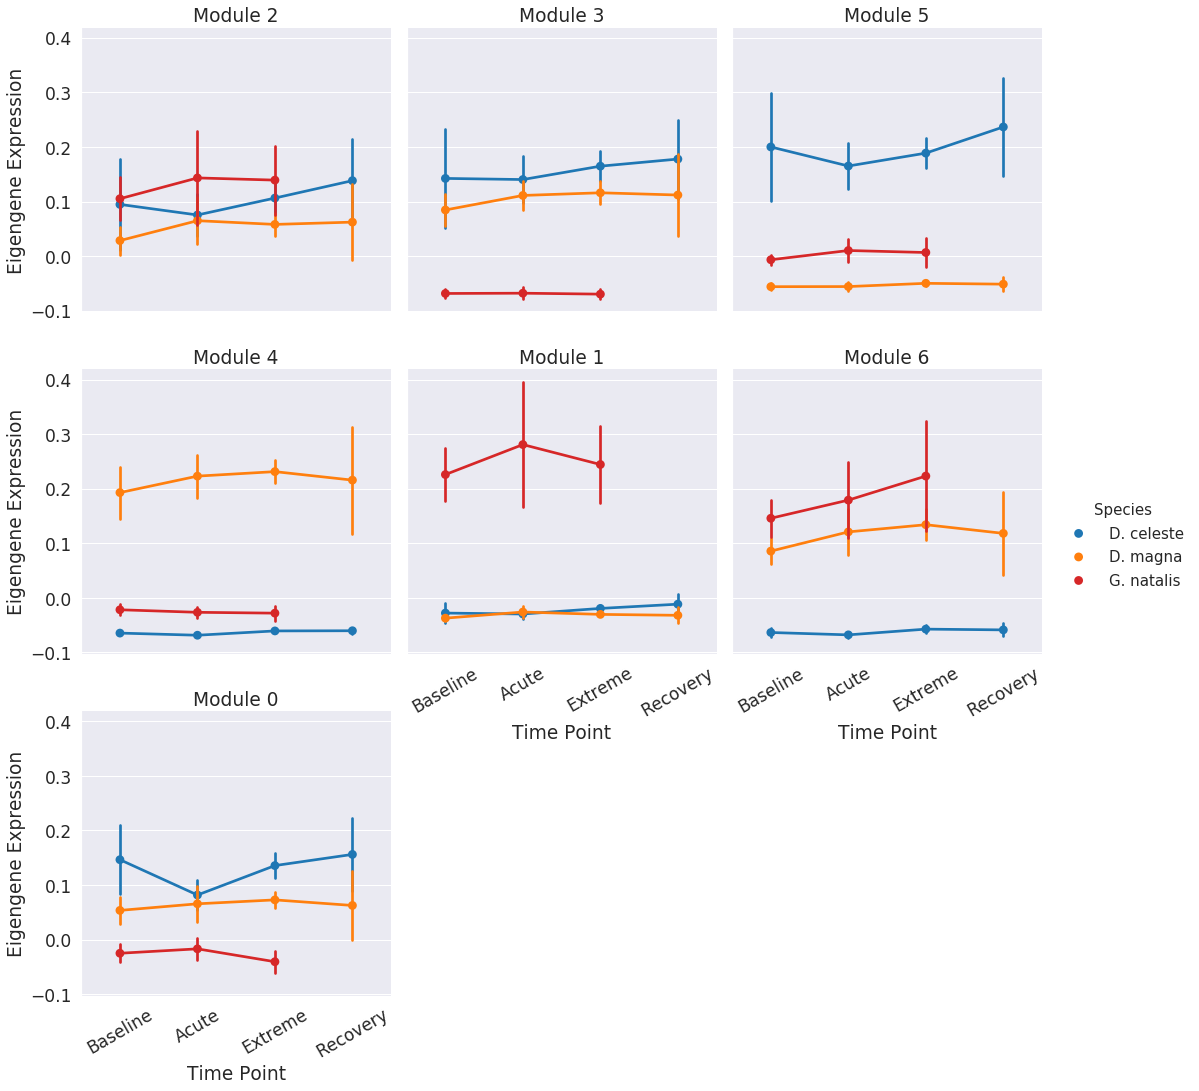

In [15]:
#create color palette for plots by species using Tableau color library
palette ={"D. celeste":"tab:blue",
         "D. magna": "tab:orange",
         "G. natalis":"tab:red"}

#group data by module, then by time point, then plot boxplot
# add margin_titles=True if using the large block of code below
g=sns.catplot(x="Time Point", y="Eigengene Expression", hue="Species", 
              col="module", data=me_melt_AN, kind="point", ci="sd", col_wrap=3, palette=palette, margin_titles=True)

#remove original axes titles
[plt.setp(ax.texts, text="") for ax in g.axes.flat]

#set new titles
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

#rotate x-axes ticks by 30 degrees
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)

#adjust whitespace around plots
g.fig.subplots_adjust(wspace=.05, hspace=.2)

#make legend text larger
plt.setp(g._legend.get_title(), fontsize=15)
plt.setp(g._legend.get_texts(), fontsize=15)